In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from common import Fonts, NWSL, Colors, add_twitter_handle, add_source

In [61]:
df = pd.read_csv("joined.csv")
df = df.sort_values("nwsl_minutes").reset_index(drop=True)
df

,name,uswnt_minutes,nwsl_minutes
0,Lindsey Horan,500,0
1,Rose Lavelle,299,179
2,Mallory Swanson,426,180
3,Midge Purce,78,200
4,Julie Ertz,69,246
5,Taylor Kornieck,93,250
6,Becky Sauerbrunn,388,351
7,Adrianna Franch,0,360
8,Kelley O'Hara,45,448
9,Megan Rapinoe,41,533


<Figure size 4000x4000 with 0 Axes>

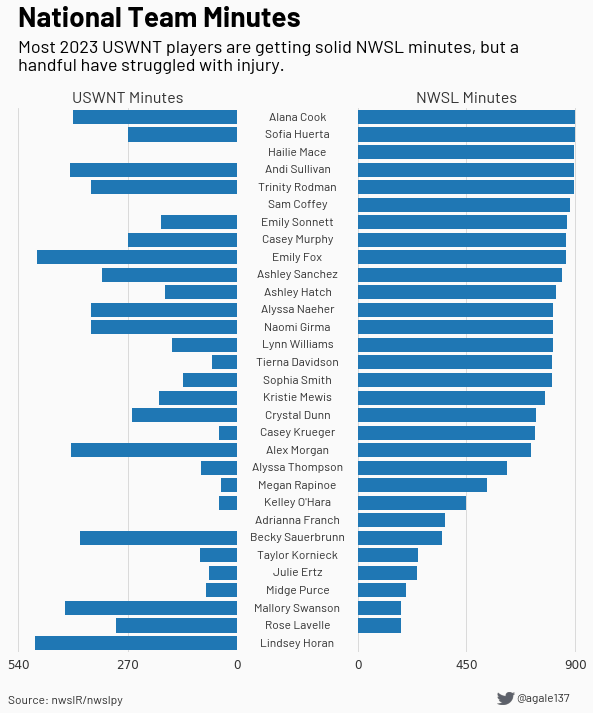

In [76]:
# Setup
plt.rcParams["figure.figsize"] = (10, 10)
plt.figure(dpi=400)
fig, axs = plt.subplots(1, 3, width_ratios=[4, 1, 4])
fig.patch.set_facecolor(Colors.WHITE)

# Plot USWNT data
axs[0].barh(
    df.index,
    df["uswnt_minutes"],
)
axs[0].set_title(
    "USWNT Minutes",
    fontproperties=Fonts.BARLOW,
    size=16,
    color=Colors.BLACK,
)


# Plot NWSL data
axs[2].barh(
    df.index,
    df["nwsl_minutes"],
)
axs[2].set_title(
    "NWSL Minutes",
    fontproperties=Fonts.BARLOW,
    size=16,
    color=Colors.BLACK,
)

# Plot names
for i, row in df.iterrows():
    axs[1].text(
        0.5,
        i,
        row["name"],
        ha="center",
        va="center",
        fontproperties=Fonts.BARLOW,
        size=12,
        color=Colors.BLACK,
    )


# Axes
axs[0].set_xlim([540, 0])
axs[0].set_xticks([540, 270, 0])
axs[1].axis("off")
axs[2].set_xlim([0, 905])
axs[2].set_xticks([0, 450, 900])
for i in range(0, 3):
    axs[i].set_facecolor(Colors.WHITE)
    axs[i].set_ylim(-0.5, 30.5)
    axs[i].spines[["top", "left", "bottom", "right"]].set_visible(False)
    axs[i].tick_params(bottom=False, left=False)
    axs[i].set_axisbelow(True)
    axs[i].xaxis.grid(True, color=Colors.LIGHT_GRAY)
    axs[i].tick_params(
        axis="both",
        which="major",
        labelsize=12,
        labelcolor=Colors.BLACK,
    )

axs[0].set_yticks([])
axs[2].set_yticks([])

# Title
axs[0].text(
    0,
    1.15,
    "National Team Minutes",
    fontproperties=Fonts.BARLOW_BOLD,
    size=28,
    ha="left",
    transform=axs[0].transAxes,
)

# Subtitle
axs[0].text(
    0,
    1.07,
    "Most 2023 USWNT players are getting solid NWSL minutes, but a\nhandful have struggled with injury.",
    fontproperties=Fonts.BARLOW,
    size=18,
    ha="left",
    transform=axs[0].transAxes,
)

# Twitter logo and username
add_twitter_handle(fig, x=0.79, y=0.05, fs=12, w=0.02)
add_source(fig, "nwslR/nwslpy", x=0.11, y=0.05, fs=12)

# Save image
plt.savefig(
    "2023-uswnt-nwsl-minutes.png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400
)